<h1>線形回帰モデル-Boston Hausing Data-</h1>

<h2>1. 必要モジュールとデータのインポート</h2>

In [1]:
#from モジュール名 import クラス名（もしくは関数名や変数名）

from sklearn.datasets import load_boston
from pandas import DataFrame, Series
import numpy as np

In [2]:
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
#DESCR変数の中身を確認(データ全体と各説明変数の説明)
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#data変数(説明変数)の中身を確認
print(boston['data'][:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [7]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

<h2>2. データフレームの作成</h2>

In [8]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns=boston.feature_names)

In [9]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

In [10]:
# DataFrameのサイズを確認(行数：事例の数，列数：説明変数＋目的変数の数)
df.shape

(506, 14)

In [11]:
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h1>線形単回帰分析</h1>

In [12]:
# カラムを指定してデータを表示(部屋数)
df[['RM']].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [13]:
# 説明変数(全てのデータから部屋数のデータを取り出す)
data = df.loc[:, ['RM']].values

In [14]:
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [15]:
# 目的変数(全てのデータから価格のデータを取り出す)
target = df.loc[:, 'PRICE'].values

In [16]:
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [17]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

In [18]:
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)

In [19]:
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression()

In [20]:
#予測
model.predict([[1]])

array([-25.5685118])

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
rooms =  np.arange(1, 11, 1)
predict_df = DataFrame(data=rooms, columns=['rooms'])

In [23]:
prices = []
for i in rooms:
  prices.append(model.predict([[i]]))
price_df = DataFrame(data=prices, columns=['prices'])

In [24]:
predict_df = predict_df.join(price_df)

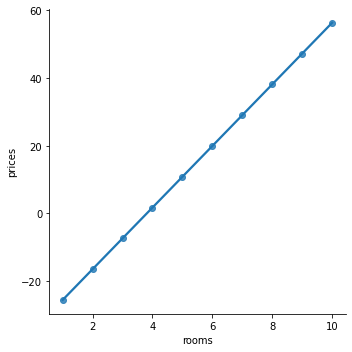

In [25]:
#散布図と回帰曲線を描く
sns.lmplot(x='rooms', y='prices', data=predict_df)
plt.show()

##考察
- 単回帰で6部屋くらいのデータが多いため、3部屋以下で回帰を計算すると正確に予想できてない（価格がマイナスになっている）。つまり、機械学習は外挿に弱い。
- データを見て外れ値や誤りがなさそうか、事前に確認すべきである。

<h1>重回帰分析(2変数)</h1>

In [35]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [36]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [37]:
# オブジェクト生成
model2 = LinearRegression()

In [38]:
# fit関数でパラメータ推定
model2.fit(data2, target2)

LinearRegression()

In [39]:
model2.predict([[0.2, 7]])

array([29.43977562])

In [40]:
rooms =  np.arange(1, 11, 1)
crims =  np.linspace(0.0, 1.0, 10)

cols = ['crims', 'rooms', 'prices']
predict_df = DataFrame(index=[], columns=cols)

for i in crims:
  for j in rooms:
    price = model2.predict([[i,j]])[0]
    record = Series([i, j, price], index=predict_df.columns)
    predict_df = predict_df.append(record, ignore_index=True)

In [41]:
predict_df

,crims,rooms,prices
0,0.0,1.0,-20.853651
1,0.0,2.0,-12.462583
2,0.0,3.0,-4.071515
3,0.0,4.0,4.319554
4,0.0,5.0,12.710622
...,...,...,...
95,1.0,6.0,20.836777
96,1.0,7.0,29.227845
97,1.0,8.0,37.618913
98,1.0,9.0,46.009982


In [42]:
print(model2.predict([[0.0, 6]]))
print(model2.predict([[0.4, 6]]))
print(model2.predict([[0.8, 6]]))

[21.10169003]
[20.99572473]
[20.88975943]


In [43]:
print(model2.predict([[0.4, 5]]))
print(model2.predict([[0.4, 6]]))
print(model2.predict([[0.4, 7]]))

[12.60465648]
[20.99572473]
[29.38679297]


##考察
- 部屋数に比べて犯罪率の価格への影響は少ないため、説明変数から外すことも検討する。
- 説明変数同士に相関関係がないかも考える必要がある。

<h1>回帰係数と切片の値を確認</h1>

In [44]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [45]:
# 重回帰の回帰係数と切片を出力
print('犯罪率と部屋数の推定された回帰係数: %.3f, %.3f, 推定された切片 : %.3f' % (model2.coef_[0], model2.coef_[1], model2.intercept_))

犯罪率と部屋数の推定された回帰係数: -0.265, 8.391, 推定された切片 : -29.245


<h1>モデルの検証</h1>

# 決定係数

In [46]:
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

単回帰決定係数: 0.484, 重回帰決定係数 : 0.542


In [47]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [48]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
# matplotlibをインポート
import matplotlib.pyplot as plt

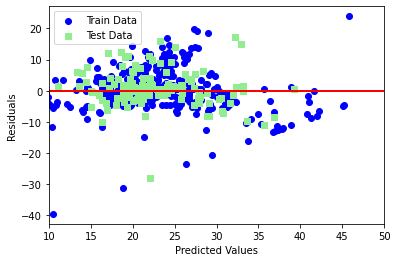

In [50]:
# 学習用、検証用それぞれで残差をプロット
# 学習用での予測値に対する残差
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
# 検証用での予測値に対する残差
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [51]:
# 平均二乗誤差を評価するためのメソッドを呼び出し
from sklearn.metrics import mean_squared_error
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 43.915, Test : 42.768
R^2 Train : 0.504, Test : 0.401
